In [1]:
import pandas as pd
df = pd.read_csv("~/Pandas/Data Set/employees.csv")

In [2]:
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance


# Renaming Columns
Ddirect assignment
- df["old_name"] = df["new_name"] 

Dictionary mapping
- df.rename(columns = {'old_name_1' : 'new_name_1',  'old_name_2' : 'new_name_2'}, inplace = True)

List comprehension
- df.columns = [col.title( ) for col in df.columns]

Lambda Function
- df.rename(columns = lambda x : x .upper( ))

# Reordering Columns

- df.reindex(labels = ["col1", "col3", "col2"], axis = 1)

# Sorting Columns Alphabetically

- df.sort_index(axis = 1)

# Column Creation using Boolean Logic
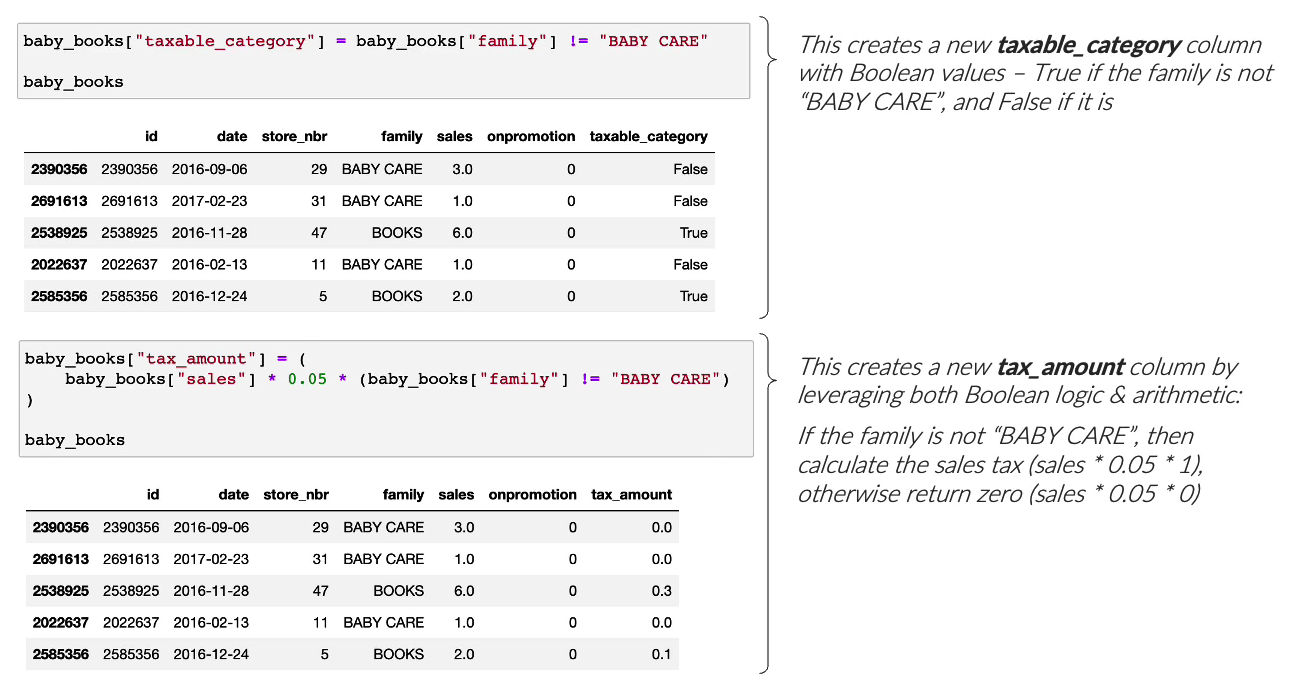

# Multiple Column Creation using Assign Method

In [3]:
import pandas as pd
import numpy as np

retail = pd.read_csv("/home/picassa240/Maven Pandas Numpy/Pandas Course Resources/retail/retail_2016_2017.csv")
sample_df = retail.sample(5, random_state = 85)
sample_df

,id,date,store_nbr,family,sales,onpromotion
383220,2329164,2016-08-03,11,MEATS,852.20404,0
883307,2829251,2017-05-11,42,PREPARED FOODS,53.28200,2
656822,2602766,2017-01-04,38,MAGAZINES,4.00000,0
389404,2335348,2016-08-06,35,BOOKS,0.00000,0
216577,2162521,2016-05-01,35,SCHOOL AND OFFICE SUPPLIES,49.00000,7


In [4]:
# Creating 4 columns
# . query adds filter 

sample_df = sample_df.assign(
on_promotion_flag = sample_df["onpromotion"] > 0,
family_abbrev = sample_df["family"].str[:3],
onpromotion_ratio = sample_df["sales"]/sample_df["onpromotion"],
sales_onprom_target = lambda x : x ["onpromotion_ratio"] > 100
).query("sales_onprom_target == True")

sample_df

,id,date,store_nbr,family,sales,onpromotion,on_promotion_flag,family_abbrev,onpromotion_ratio,sales_onprom_target
383220,2329164,2016-08-03,11,MEATS,852.20404,0,False,MEA,inf,True
656822,2602766,2017-01-04,38,MAGAZINES,4.00000,0,False,MAG,inf,True


# Basic Df operations

In [5]:
df.info()
# Note start date , login time is string type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()/len(df)*100

First Name            6.7
Gender               14.5
Start Date            0.0
Last Login Time       0.0
Salary                0.0
Bonus %               0.0
Senior Management     6.7
Team                  4.3
dtype: float64

In [7]:
df['Start Date'].head()
# Look at the format

0     8/6/1993
1    3/31/1996
2    4/23/1993
3     3/4/2005
4    1/24/1998
Name: Start Date, dtype: object

In [8]:
pd.to_datetime(df["Start Date"]).head()

0   1993-08-06
1   1996-03-31
2   1993-04-23
3   2005-03-04
4   1998-01-24
Name: Start Date, dtype: datetime64[ns]

In [9]:
df['Start Date'] = pd.to_datetime(df["Start Date"]).head()
df["Last Login Time"] = pd.to_datetime(df["Last Login Time"])

In [10]:
df["Last Login Time"].head()

0   2023-02-16 12:42:00
1   2023-02-16 06:53:00
2   2023-02-16 11:17:00
3   2023-02-16 13:00:00
4   2023-02-16 16:47:00
Name: Last Login Time, dtype: datetime64[ns]

In [11]:
df.info()
# NOTE : 62KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         5 non-null      datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 62.6+ KB


In [12]:
# Note Senior Mgmt is shown as object type but it has boolena values
df["Senior Management"] = df["Senior Management"].astype("bool")
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         5 non-null      datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 212.6 KB


In [13]:
df.memory_usage(deep = True)
# Memory used by each column 

Index                  128
First Name           60716
Gender               57657
Start Date            8000
Last Login Time       8000
Salary                8000
Bonus %               8000
Senior Management     1000
Team                 66163
dtype: int64

# Memory Optimisation

1. Drop unnecessary columns (when possible, avoid reading them in at all)

2. Convert object types to numeric or datetime datatypes where possible

3. Downcast numeric data to the smallest appropriate bit size e.g. df.astype({"col1" : "Int8", "col2" : "Int16"})

4. Use the categorical datatype


In [14]:
# Storing categorical values for Gender column
df["Gender"] = df["Gender"].astype("category")

# Another way
df = df.astype({"Gender" : "category", "First Name" : "string", "Salary" : "Int32"})

In [15]:
df.info(memory_usage= "deep")

df.memory_usage(deep = True)

# NOTE : 57 KB size reduced ie a 25% reduction
# Salary came from 8000 to 5000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    string        
 1   Gender             855 non-null    category      
 2   Start Date         5 non-null      datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   Int32         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: Int32(1), bool(1), category(1), datetime64[ns](2), float64(1), object(1), string(1)
memory usage: 155.1 KB


Index                  128
First Name           61252
Gender                1232
Start Date            8000
Last Login Time       8000
Salary                5000
Bonus %               8000
Senior Management     1000
Team                 66163
dtype: int64

In [16]:
# Another way to change to date time format
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])

# df['Start Date'] = pd.to_datetime(df["Start Date"]).head()
# df["Last Login Time"] = pd.to_datetime(df["Last Login Time"])

df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    category      
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   bool          
 7   Team               957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 49.1+ KB


# FILTER df based on condition
1. df[col_name] == value returns a boolean column of T/F

2. df[df[col_name] == value]] : Pandas returns a column with values that are TRUE

3. For multiple conditions, store it in different variables and then pass all of them 

4. We can also filter a SERIES/Df by passing a logical test into the .loc[ ] accessor. But for this, we need to set a column as index label 

In [17]:
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance


In [18]:
# Pull values where Gender  = Male
filter = df["Gender"] == "Male"
df[filter]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,2013-06-21,2023-02-16 17:47:00,98874,4.479,True,Marketing
996,Phillip,Male,1984-01-31,2023-02-16 06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,2023-02-16 12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,2023-02-16 16:45:00,60500,11.985,False,Business Development


In [19]:
# To filter df using .loc[] accessor
# Set index_col = "Gender"
# Now use df.loc["Male"]

In [20]:
# Senior management column already has boolean values
df[df["Senior Management"]]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services
6,Ruby,Female,1987-08-17,2023-02-16 16:20:00,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
991,Rose,Female,2002-08-25,2023-02-16 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2023-02-16 08:35:00,112769,11.625,True,Finance
993,Tina,Female,1997-05-15,2023-02-16 15:53:00,56450,19.040,True,Engineering
994,George,Male,2013-06-21,2023-02-16 17:47:00,98874,4.479,True,Marketing


In [21]:
# Return df where Team IS NOT Marketing
not_mktg = df["Team"] != "Marketing"
df[not_mktg]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
995,Henry,NaN,2014-11-23,2023-02-16 06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,2023-02-16 06:30:00,42392,19.675,False,Finance
997,Russell,Male,2013-05-20,2023-02-16 12:39:00,96914,1.421,False,Product
998,Larry,Male,2013-04-20,2023-02-16 16:45:00,60500,11.985,False,Business Development


In [22]:
# Return salaries greater than 10k
pay = df["Salary"] > 100000
df[pay]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
9,Frances,Female,2002-08-08,2023-02-16 06:51:00,139852,7.524,True,Business Development
...,...,...,...,...,...,...,...,...
990,Robin,Female,1987-07-24,2023-02-16 13:35:00,100765,10.982,True,Client Services
991,Rose,Female,2002-08-25,2023-02-16 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2023-02-16 08:35:00,112769,11.625,True,Finance
995,Henry,NaN,2014-11-23,2023-02-16 06:09:00,132483,16.655,False,Distribution


In [23]:
date = df["Start Date"] <= "1994-5-13"
df[date]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
6,Ruby,Female,1987-08-17,2023-02-16 16:20:00,65476,10.012,True,Product
10,Louise,Female,1980-08-12,2023-02-16 09:01:00,63241,15.132,True,NaN
...,...,...,...,...,...,...,...,...
985,Stephen,NaN,1983-07-10,2023-02-16 20:10:00,85668,1.909,False,Legal
986,Donna,Female,1982-11-26,2023-02-16 07:04:00,82871,17.999,False,Marketing
989,Justin,NaN,1991-02-10,2023-02-16 16:58:00,38344,3.794,False,Legal
990,Robin,Female,1987-07-24,2023-02-16 13:35:00,100765,10.982,True,Client Services


# Multiple Conditions using & , | operators

In [24]:
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

mask_1 = df["Gender"] == "Male"
mask_2 = df["Team"] == "Marketing"
mask_3 = df["Salary"] >100000
mask_4 = df["Start Date"] <= "1990-01-01"

df[mask_1 & mask_2 & mask_3]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
21,Matthew,Male,1995-09-05,2023-02-16 02:12:00,100612,13.645,False,Marketing
77,Charles,Male,2004-09-14,2023-02-16 20:13:00,107391,1.260,True,Marketing
150,Sean,Male,1996-05-04,2023-02-16 20:59:00,135490,19.934,False,Marketing
216,Matthew,Male,2013-07-31,2023-02-16 08:04:00,142373,2.462,False,Marketing
293,Jesse,Male,1999-10-25,2023-02-16 15:35:00,118733,9.653,False,Marketing
403,Craig,Male,1984-02-08,2023-02-16 04:45:00,113506,19.642,False,Marketing
413,Johnny,Male,1992-09-14,2023-02-16 08:21:00,115194,5.861,True,Marketing
452,Scott,Male,2012-11-17,2023-02-16 14:47:00,146812,1.965,True,Marketing
454,NaN,Male,1995-02-21,2023-02-16 00:26:00,136602,10.429,True,Marketing
503,Roger,Male,2015-08-03,2023-02-16 16:56:00,125033,4.887,True,Marketing


In [25]:
df[mask_3 | mask_4]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
6,Ruby,Female,1987-08-17,2023-02-16 16:20:00,65476,10.012,True,Product
...,...,...,...,...,...,...,...,...
991,Rose,Female,2002-08-25,2023-02-16 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2023-02-16 08:35:00,112769,11.625,True,Finance
995,Henry,NaN,2014-11-23,2023-02-16 06:09:00,132483,16.655,False,Distribution
996,Phillip,Male,1984-01-31,2023-02-16 06:30:00,42392,19.675,False,Finance


In [26]:
# When clubbing & and |, use () to club the masks 
df[(mask_1 & mask_2) | mask_3]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
991,Rose,Female,2002-08-25,2023-02-16 05:12:00,134505,11.051,True,Marketing
992,Anthony,Male,2011-10-16,2023-02-16 08:35:00,112769,11.625,True,Finance
994,George,Male,2013-06-21,2023-02-16 17:47:00,98874,4.479,True,Marketing
995,Henry,NaN,2014-11-23,2023-02-16 06:09:00,132483,16.655,False,Distribution


# Filter using  .query( ) method

IMP : For query method to work, col names must NOT have a space

In [27]:
bond = pd.read_csv("/home/picassa240/Pandas/Data Set/jamesbond.csv")
bond.sort_index(inplace = True)
bond.head(3)

,Film,Year,Actor,Director,Box Office,Budget,Bond Actor Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2


In [28]:
bond.columns = [column_name.replace(" ","_") for column_name in bond.columns]
bond.head()

,Film,Year,Actor,Director,Box_Office,Budget,Bond_Actor_Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN


In [29]:
bond.query('Actor == "Sean Connery"')

,Film,Year,Actor,Director,Box_Office,Budget,Bond_Actor_Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
13,Never Say Never Again,1983,Sean Connery,Irvin Kershner,380.0,86.0,NaN


In [30]:
# Note the usage of single and double quotes
# If you use single quotes for col names then use double for col values and vice versa

bond.query("Actor == 'Sean Connery'")

,Film,Year,Actor,Director,Box_Office,Budget,Bond_Actor_Salary
0,Dr. No,1962,Sean Connery,Terence Young,448.8,7.0,0.6
1,From Russia with Love,1963,Sean Connery,Terence Young,543.8,12.6,1.6
2,Goldfinger,1964,Sean Connery,Guy Hamilton,820.4,18.6,3.2
3,Thunderball,1965,Sean Connery,Terence Young,848.1,41.9,4.7
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
7,Diamonds Are Forever,1971,Sean Connery,Guy Hamilton,442.5,34.7,5.8
13,Never Say Never Again,1983,Sean Connery,Irvin Kershner,380.0,86.0,NaN


In [31]:
bond.query("Actor in ['Sean Connery', 'David Niven'] and Budget > 50")

,Film,Year,Actor,Director,Box_Office,Budget,Bond_Actor_Salary
4,Casino Royale,1967,David Niven,Ken Hughes,315.0,85.0,NaN
5,You Only Live Twice,1967,Sean Connery,Lewis Gilbert,514.2,59.9,4.4
13,Never Say Never Again,1983,Sean Connery,Irvin Kershner,380.0,86.0,NaN


In [32]:
bond.query("Actor not in ['Sean Connery', 'David Niven'] and Budget > 100")

,Film,Year,Actor,Director,Box_Office,Budget,Bond_Actor_Salary
19,Tomorrow Never Dies,1997,Pierce Brosnan,Roger Spottiswoode,463.2,133.9,10.0
20,The World Is Not Enough,1999,Pierce Brosnan,Michael Apted,439.5,158.3,13.5
21,Die Another Day,2002,Pierce Brosnan,Lee Tamahori,465.4,154.2,17.9
22,Casino Royale,2006,Daniel Craig,Martin Campbell,581.5,145.3,3.3
23,Quantum of Solace,2008,Daniel Craig,Marc Forster,514.2,181.4,8.1
24,Skyfall,2012,Daniel Craig,Sam Mendes,943.5,170.2,14.5
25,Spectre,2015,Daniel Craig,Sam Mendes,726.7,206.3,NaN


# Inclusion check with .isin( ) Method

1. isin() can take list, tuple or another series as input

In [33]:
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

In [34]:
mask = df["Team"].isin(["Legal", "Sales", "Product"])
df[mask]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
5,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
6,Ruby,Female,1987-08-17,2023-02-16 16:20:00,65476,10.012,True,Product
11,Julie,Female,1997-10-26,2023-02-16 15:19:00,102508,12.637,True,Legal
13,Gary,Male,2008-01-27,2023-02-16 23:40:00,109831,5.831,False,Sales
15,Lillian,Female,2016-06-05,2023-02-16 06:09:00,59414,1.256,False,Product
...,...,...,...,...,...,...,...,...
981,James,Male,1993-01-15,2023-02-16 17:19:00,148985,19.280,False,Legal
985,Stephen,NaN,1983-07-10,2023-02-16 20:10:00,85668,1.909,False,Legal
989,Justin,NaN,1991-02-10,2023-02-16 16:58:00,38344,3.794,False,Legal
997,Russell,Male,2013-05-20,2023-02-16 12:39:00,96914,1.421,False,Product


# Check inclusion within range using BETWEEN method

In [35]:
# BETWEN Method
mask = df["Salary"].between(60000,70000)
df[mask]
# Both ends are inclusive

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
6,Ruby,Female,1987-08-17,2023-02-16 16:20:00,65476,10.012,True,Product
10,Louise,Female,1980-08-12,2023-02-16 09:01:00,63241,15.132,True,NaN
20,Lois,NaN,1995-04-22,2023-02-16 19:18:00,64714,4.934,True,Legal
41,Christine,NaN,2015-06-28,2023-02-16 01:08:00,66582,11.308,True,Business Development
...,...,...,...,...,...,...,...,...
965,Catherine,Female,1989-09-25,2023-02-16 01:31:00,68164,18.393,False,Client Services
970,Alice,Female,1988-09-03,2023-02-16 20:54:00,63571,15.397,True,Product
974,Harry,Male,2011-08-30,2023-02-16 18:31:00,67656,16.455,True,Client Services
978,Sean,Male,1983-01-17,2023-02-16 14:23:00,66146,11.178,False,Human Resources


In [36]:
mask = df["Start Date"].between("1991-11-26", "1994-05-13")
df[mask]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
24,John,Male,1992-07-01,2023-02-16 22:08:00,97950,13.873,False,Client Services
33,Jean,Female,1993-12-18,2023-02-16 09:07:00,119082,16.180,False,Business Development
87,Annie,Female,1993-01-30,2023-02-16 02:05:00,144887,8.276,True,Sales
88,Donna,Female,1991-11-27,2023-02-16 13:59:00,64088,6.155,True,Legal
93,Virginia,NaN,1994-05-07,2023-02-16 17:58:00,111858,1.601,True,Legal
96,Cynthia,Female,1994-03-21,2023-02-16 08:34:00,142321,1.737,False,Finance
106,Paul,Male,1993-08-04,2023-02-16 19:25:00,42146,3.046,False,Legal
131,Rebecca,Female,1992-07-10,2023-02-16 00:23:00,94231,17.517,False,Product


# Checking Missing Values/NaN or NULLS and 
with isnull() / notnull() method

- Pandas treats NaN values as a float, which allows them to be used in vectorized operations

- Arithmatic Ops dont affect NaN , so .add (2, fill_value = 0 etc)

- Pandas released its own missing data type, NA, in December 2020 This allows missing values to be stored as integers, instead of needing to convert to float

- .isna() method returns a DataFrame with Boolean values (True for NAs, False for others)

- .sum() method adds these for each column (True=1, False=0) and returns the summarized results

- .value_counts( ) returns unique values and their frequency. It ignores NaN. To get NaN frequency set dropna= False 

- .value_counts(dropna = False )

In [37]:
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance


In [38]:
mask = df["Team"].isnull()
df[mask]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
10,Louise,Female,1980-08-12,2023-02-16 09:01:00,63241,15.132,True,NaN
23,NaN,Male,2012-06-14,2023-02-16 16:19:00,125792,5.042,True,NaN
32,NaN,Male,1998-08-21,2023-02-16 14:27:00,122340,6.417,True,NaN
91,James,NaN,2005-01-26,2023-02-16 23:00:00,128771,8.309,False,NaN
109,Christopher,Male,2000-04-22,2023-02-16 10:15:00,37919,11.449,False,NaN
139,NaN,Female,1990-10-03,2023-02-16 01:08:00,132373,10.527,True,NaN
199,Jonathan,Male,2009-07-17,2023-02-16 08:15:00,130581,16.736,True,NaN
258,Michael,Male,2002-01-24,2023-02-16 03:04:00,43586,12.659,False,NaN
290,Jeremy,Male,1988-06-14,2023-02-16 18:20:00,129460,13.657,True,NaN


In [39]:
mask = df["Gender"].notnull()
df[mask].head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,1993-08-06,2023-02-16 12:42:00,97308,6.945,True,Marketing
1,Thomas,Male,1996-03-31,2023-02-16 06:53:00,61933,4.170,True,NaN
2,Maria,Female,1993-04-23,2023-02-16 11:17:00,130590,11.858,False,Finance
3,Jerry,Male,2005-03-04,2023-02-16 13:00:00,138705,9.340,True,Finance
4,Larry,Male,1998-01-24,2023-02-16 16:47:00,101004,1.389,True,Client Services


# Handling Missing Values
by either removing them or replacing them with other values (0, mean, seperate values for each col)

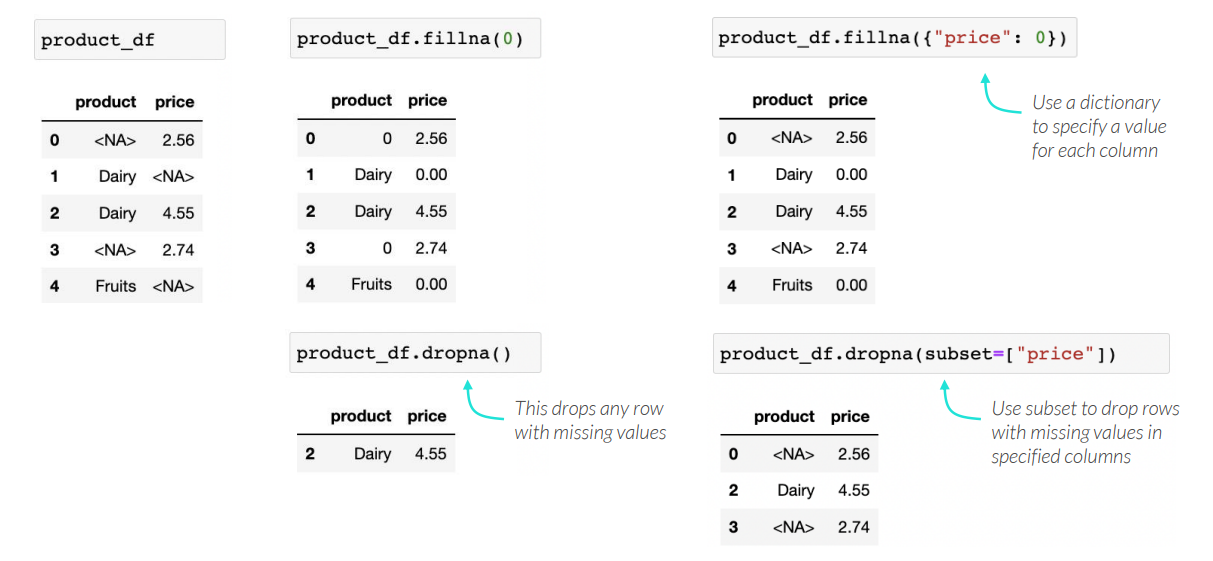

# Checking Duplicates and Deleting using 

1. .duplicated() and drop_duplicates() method

2. drop_duplicates() is applicable on df rather than just a series

In [40]:
import pandas as pd
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

df.sort_values("First Name", inplace=True, ignore_index= True)
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
1,Aaron,Male,1994-01-29,2023-02-16 18:48:00,58755,5.097,True,Marketing
2,Aaron,Male,1990-07-22,2023-02-16 14:53:00,52119,11.343,True,Client Services


In [41]:
df["First Name"]

0      Aaron
1      Aaron
2      Aaron
3      Aaron
4       Adam
       ...  
995      NaN
996      NaN
997      NaN
998      NaN
999      NaN
Name: First Name, Length: 1000, dtype: object

In [42]:
df["First Name"].duplicated()
# By default keep parameter is set to 'First'. This means
# Pandas treats the first instance as unique (False) and subsequent ones as duplicates (True)

0      False
1       True
2       True
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Name: First Name, Length: 1000, dtype: bool

In [43]:
# Another method to get duplicates. Subset refers to col name 
df.duplicated(subset = 'First Name')

0      False
1       True
2       True
3       True
4      False
       ...  
995     True
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

In [44]:
mask = df["First Name"].duplicated(keep = "last")

In [45]:
df[df["First Name"].duplicated(keep = "last")]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
1,Aaron,Male,1994-01-29,2023-02-16 18:48:00,58755,5.097,True,Marketing
2,Aaron,Male,1990-07-22,2023-02-16 14:53:00,52119,11.343,True,Client Services
4,Adam,Male,2011-05-21,2023-02-16 01:45:00,95327,15.120,False,Distribution
5,Adam,Male,1990-12-24,2023-02-16 20:57:00,110194,14.727,True,Product
...,...,...,...,...,...,...,...,...
994,NaN,Male,2015-11-24,2023-02-16 03:11:00,145329,7.100,True,Finance
995,NaN,Male,2001-05-23,2023-02-16 19:52:00,103877,6.322,True,Distribution
996,NaN,Female,2000-08-23,2023-02-16 16:19:00,95866,19.388,True,Sales
997,NaN,Female,1985-09-15,2023-02-16 01:50:00,133472,16.941,True,Distribution


In [46]:
# Removing all duplicate instances
dup = df["First Name"].duplicated(keep=False)
df[dup]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
1,Aaron,Male,1994-01-29,2023-02-16 18:48:00,58755,5.097,True,Marketing
2,Aaron,Male,1990-07-22,2023-02-16 14:53:00,52119,11.343,True,Client Services
3,Aaron,NaN,1986-01-22,2023-02-16 19:39:00,63126,18.424,False,Client Services
4,Adam,Male,2011-05-21,2023-02-16 01:45:00,95327,15.120,False,Distribution
...,...,...,...,...,...,...,...,...
995,NaN,Male,2001-05-23,2023-02-16 19:52:00,103877,6.322,True,Distribution
996,NaN,Female,2000-08-23,2023-02-16 16:19:00,95866,19.388,True,Sales
997,NaN,Female,1985-09-15,2023-02-16 01:50:00,133472,16.941,True,Distribution
998,NaN,Male,2012-07-30,2023-02-16 15:07:00,107351,5.329,True,Marketing


In [47]:
# Now we need to negate the TRUE to FALSE so all values are rejected 
dup_remove = ~df["First Name"].duplicated(keep=False)
df[dup_remove]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
46,Angela,Female,2005-11-22,2023-02-16 06:29:00,95570,18.523,True,Engineering
134,Brian,Male,2007-04-07,2023-02-16 22:47:00,93901,17.821,True,Legal
151,Carol,Female,1996-03-19,2023-02-16 03:39:00,57783,9.129,False,Finance
207,David,Male,2009-12-05,2023-02-16 08:48:00,92242,15.407,False,Legal
225,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
274,Eugene,Male,1984-05-24,2023-02-16 10:54:00,81077,2.117,False,Sales
392,Jean,Female,1993-12-18,2023-02-16 09:07:00,119082,16.180,False,Business Development
517,Keith,Male,2003-02-12,2023-02-16 15:02:00,120672,19.467,False,Legal
866,Tammy,Female,1984-11-11,2023-02-16 10:30:00,132839,17.463,True,Client Services


# NOTE  :  .drop_duplicates() 
- removes values where 2 or more rows are exactly identical

In [48]:
import pandas as pd
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

df.sort_values("First Name", inplace=True)
df.head(3)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
101,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
327,Aaron,Male,1994-01-29,2023-02-16 18:48:00,58755,5.097,True,Marketing
440,Aaron,Male,1990-07-22,2023-02-16 14:53:00,52119,11.343,True,Client Services


In [49]:
len(df)

1000

In [50]:
len(df.drop_duplicates())

1000

In [51]:
# To check for duplicates in selected columns we need to specify col_names in subset paramter
df.drop_duplicates(subset="First Name", keep="first")

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
101,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
137,Adam,Male,2011-05-21,2023-02-16 01:45:00,95327,15.120,False,Distribution
300,Alan,Male,1988-06-26,2023-02-16 03:54:00,111786,3.592,True,Engineering
372,Albert,Male,1997-02-01,2023-02-16 16:20:00,67827,19.717,True,Engineering
988,Alice,Female,2004-10-05,2023-02-16 09:34:00,47638,11.209,False,Human Resources
...,...,...,...,...,...,...,...,...
433,Wanda,Female,2008-07-20,2023-02-16 13:44:00,65362,7.132,True,Legal
177,Wayne,Male,2012-04-07,2023-02-16 08:00:00,102652,14.085,True,Distribution
820,William,Male,1993-11-18,2023-02-16 12:27:00,54058,5.182,True,Human Resources
450,Willie,Male,2009-08-22,2023-02-16 13:03:00,55038,19.691,False,Legal


In [52]:
# Another way to get above result and reset index as well

df.drop_duplicates(subset = "First Name", keep = "first", ignore_index = True)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
1,Adam,Male,2011-05-21,2023-02-16 01:45:00,95327,15.120,False,Distribution
2,Alan,Male,1988-06-26,2023-02-16 03:54:00,111786,3.592,True,Engineering
3,Albert,Male,1997-02-01,2023-02-16 16:20:00,67827,19.717,True,Engineering
4,Alice,Female,2004-10-05,2023-02-16 09:34:00,47638,11.209,False,Human Resources
...,...,...,...,...,...,...,...,...
196,Wanda,Female,2008-07-20,2023-02-16 13:44:00,65362,7.132,True,Legal
197,Wayne,Male,2012-04-07,2023-02-16 08:00:00,102652,14.085,True,Distribution
198,William,Male,1993-11-18,2023-02-16 12:27:00,54058,5.182,True,Human Resources
199,Willie,Male,2009-08-22,2023-02-16 13:03:00,55038,19.691,False,Legal


In [53]:
# To remove values if they repeat even once, set keep paramter to False
df.drop_duplicates(subset="First Name", keep=False, ignore_index = True)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Angela,Female,2005-11-22,2023-02-16 06:29:00,95570,18.523,True,Engineering
1,Brian,Male,2007-04-07,2023-02-16 22:47:00,93901,17.821,True,Legal
2,Carol,Female,1996-03-19,2023-02-16 03:39:00,57783,9.129,False,Finance
3,David,Male,2009-12-05,2023-02-16 08:48:00,92242,15.407,False,Legal
4,Dennis,Male,1987-04-18,2023-02-16 01:35:00,115163,10.125,False,Legal
5,Eugene,Male,1984-05-24,2023-02-16 10:54:00,81077,2.117,False,Sales
6,Jean,Female,1993-12-18,2023-02-16 09:07:00,119082,16.180,False,Business Development
7,Keith,Male,2003-02-12,2023-02-16 15:02:00,120672,19.467,False,Legal
8,Tammy,Female,1984-11-11,2023-02-16 10:30:00,132839,17.463,True,Client Services


In [54]:
# Looking duplicates across multiple columns
df.drop_duplicates(subset=["First Name", "Team"])

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
101,Aaron,Male,2012-02-17,2023-02-16 10:20:00,61602,11.849,True,Marketing
440,Aaron,Male,1990-07-22,2023-02-16 14:53:00,52119,11.343,True,Client Services
137,Adam,Male,2011-05-21,2023-02-16 01:45:00,95327,15.120,False,Distribution
141,Adam,Male,1990-12-24,2023-02-16 20:57:00,110194,14.727,True,Product
302,Adam,Male,2007-07-05,2023-02-16 11:59:00,71276,5.027,True,Human Resources
...,...,...,...,...,...,...,...,...
149,NaN,Female,2014-08-17,2023-02-16 14:00:00,86230,8.578,True,Distribution
157,NaN,Female,2005-07-27,2023-02-16 08:32:00,79536,14.443,True,Product
269,NaN,Female,1992-08-02,2023-02-16 20:35:00,145316,18.517,True,Human Resources
329,NaN,Male,2010-01-27,2023-02-16 02:57:00,87760,14.987,True,Engineering


# Counting Uniques, Handling NaN

- with .unique()  &  .nunique()

- with df[col].dropna( ) or df.dropna( )
- df[col].fillna("Text" or Value like 0 or df[col].mean())


In [55]:
df = pd.read_csv("~/Pandas/Data Set/employees.csv", parse_dates=["Start Date", "Last Login Time"])
df["Senior Management"] = df["Senior Management"].astype("bool")
df["Gender"] = df["Gender"].astype("category")

df["Gender"].unique()

['Male', 'Female', NaN]
Categories (2, object): ['Female', 'Male']

In [56]:
len(df["Team"].unique())

11

In [57]:
df["Team"].nunique()
# NOTE : nunique() ignores NaN/NULL as dropna parameter is set to True by default

10

In [58]:
df["Team"].nunique(dropna=False)

11

In [59]:
# Creating series with NaN

import pandas as pd
import numpy as np

my_series = pd.Series([np.NaN]*5)
my_series

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [60]:
my_series.isna()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [61]:
# Count of missing values
my_series.isna().sum()

5

In [62]:
my_series = pd.Series(range(5))
my_series.iloc[1:2] = pd.NA
my_series

0    0.0
1    NaN
2    2.0
3    3.0
4    4.0
dtype: float64

In [63]:
# Indexes are also dropped
my_series.dropna()

0    0.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [64]:
# Reseting index
my_series.dropna().reset_index(drop = True)

0    0.0
1    2.0
2    3.0
3    4.0
dtype: float64

In [65]:
my_series.isna()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [66]:
my_series.value_counts()

0.0    1
2.0    1
3.0    1
4.0    1
dtype: int64

In [67]:
# Getting count of each value including NaN
my_series.value_counts(dropna = False)

0.0    1
NaN    1
2.0    1
3.0    1
4.0    1
dtype: int64

In [68]:
# Filling missing values
my_series.fillna(my_series.mean())

0    0.00
1    2.25
2    2.00
3    3.00
4    4.00
dtype: float64